# Мещерякова Ксения

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

### Датасет представляет собой данные о расходах домохозяйства на один из видов потребляемых ресурсов

In [2]:
#открываем файл с данными и выводим на экран
data = pd.read_csv("DS_2019_public.csv", encoding='latin-1', index_col = 0)
data

C:\Users\KSENIA\AppData\Local\Temp\ipykernel_7136\1082765081.py:2: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("DS_2019_public.csv", encoding='latin-1', index_col = 0)


,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
Climate_Region_Pub,,,,,,,,,,,,,,,,,,,,,
5,10,26,16.793,17,181.998,620.979,621,368,38606,0,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,48.901,49,184.459,629.389,629,582,40248,-2,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,0,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
1,1,1,0,0,0.000,0.000,0,616,36136,1,...,2,13884,5,85.138,85,5,0,1,5,346.468
1,4,10,45.132,45,274.530,936.677,937,685,74100,1,...,3,14204,6,151.319,151,6,0,1,5,920.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,13,345.8,346,2695.625,9197.516,9198,820,26863,0,...,8,7179,5,264.409,264,7,0,0,5,2061.159
1,3,9,13.005,13,97.497,332.665,333,521,49610,1,...,4,6471,6,75.569,76,5,0,1,5,566.544
1,4,10,97.67,98,847.734,2892.504,2893,591,70626,0,...,-2,24391,6,250.313,250,8,0,1,1,2172.621


In [3]:
#Выводим первые 5 записей
data.head()

,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
Climate_Region_Pub,,,,,,,,,,,,,,,,,,,,,
5,10,26,16.793,17,181.998,620.979,621,368,38606,0,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,48.901,49,184.459,629.389,629,582,40248,-2,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,0,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
1,1,1,0,0,0.000,0.000,0,616,36136,1,...,2,13884,5,85.138,85,5,0,1,5,346.468
1,4,10,45.132,45,274.530,936.677,937,685,74100,1,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [4]:
#Выводим последние 5 записей
data.tail()

,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
Climate_Region_Pub,,,,,,,,,,,,,,,,,,,,,
4,5,13,345.8,346,2695.625,9197.516,9198,820,26863,0,...,8,7179,5,264.409,264,7,0,0,5,2061.159
1,3,9,13.005,13,97.497,332.665,333,521,49610,1,...,4,6471,6,75.569,76,5,0,1,5,566.544
1,4,10,97.67,98,847.734,2892.504,2893,591,70626,0,...,-2,24391,6,250.313,250,8,0,1,1,2172.621
1,8,23,12.834,13,135.687,462.975,463,432,49821,1,...,0,12416,6,175.135,175,5,0,1,1,1851.648
5,10,26,0,0,0.000,0.000,0,236,21764,1,...,3,8017,6,49.364,49,4,0,1,5,418.766


In [5]:
data=data.reset_index() 
data

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,4,5,13,345.8,346,2695.625,9197.516,9198,820,26863,...,8,7179,5,264.409,264,7,0,0,5,2061.159
10871,1,3,9,13.005,13,97.497,332.665,333,521,49610,...,4,6471,6,75.569,76,5,0,1,5,566.544
10872,1,4,10,97.67,98,847.734,2892.504,2893,591,70626,...,-2,24391,6,250.313,250,8,0,1,1,2172.621
10873,1,8,23,12.834,13,135.687,462.975,463,432,49821,...,0,12416,6,175.135,175,5,0,1,1,1851.648


In [6]:
data['Climate_Region_Pub'].value_counts()

Climate_Region_Pub
1    3593
4    3169
3    1957
2    1544
5     612
Name: count, dtype: int64

In [7]:
#Описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Columns: 121 entries, Climate_Region_Pub to KWHRFG
dtypes: float64(34), int64(79), object(8)
memory usage: 10.0+ MB


In [8]:
#Статистика данных
data.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,...,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,-0.082943,...,63.789609,0.818115,16313.564138,3.675126,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,310.691148,2480.831034,8464.594227,8464.591405,505.921369,35823.762607,1.066451,...,14.406053,2.346643,13733.416871,2.775507,106.994526,2.636779,0.028757,0.500020,2.841844,778.588285
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,-2.000000,-9.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000
25%,1.000000,3.000000,8.000000,18.000000,143.161500,488.477000,488.500000,222.000000,8748.500000,0.000000,...,62.000000,0.000000,7708.000000,2.000000,86.000000,4.000000,0.000000,0.000000,1.000000,723.870500
50%,3.000000,5.000000,15.000000,90.000000,748.220000,2552.933000,2553.000000,431.000000,27289.000000,0.000000,...,67.000000,0.000000,12761.000000,5.000000,127.000000,5.000000,0.000000,1.000000,5.000000,1047.355000
75%,4.000000,7.000000,21.000000,263.000000,2281.322500,7783.797500,7784.000000,762.500000,55784.500000,1.000000,...,70.000000,2.000000,21169.500000,5.000000,193.000000,7.000000,0.000000,1.000000,5.000000,1558.283000
max,5.000000,10.000000,27.000000,7729.000000,60995.431000,208116.552000,208117.000000,9264.000000,548711.000000,1.000000,...,90.000000,40.000000,284130.000000,8.000000,2490.000000,23.000000,1.000000,1.000000,5.000000,11069.027000


In [9]:
#Выводим названия столбцов
data.columns

Index(['Climate_Region_Pub', 'DIVISION', 'REPORTABLE_DOMAIN', 'DOLELCOL',
       'TOTALDOLCOL', 'KWHCOL', 'BTUELCOL', 'TOTALBTUCOL', 'TOTALDOLSPH',
       'TOTALBTUSPH',
       ...
       'LGT1EE', 'TOTALBTUWTH', 'ROOFTYPE', 'DOLELRFG', 'TOTALDOLRFG',
       'HEATROOM', 'WDWATER', 'UGWARM', 'DRYRFUEL', 'KWHRFG'],
      dtype='object', length=121)

In [10]:
# Удалите строки с некорректными значениями
data = data[~data.apply(lambda row: row.astype(str).str.contains('[^0-9.]').any(), axis=1)]
# Затем выполните масштабирование
X = data.drop(['TOTALDOL'], axis=1)
y = data['TOTALDOL']
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [11]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)
print(f'Train : {X_train_val.shape}, Test : {X_test.shape}')
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (3976, 120), Test : (995, 120)
Train : (3180, 120), Test : (796, 120)


In [12]:
regressor = Sequential()
regressor.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
regressor.add(Dense(1))
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1936      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1953 (7.63 KB)
Trainable params: 1953 (7.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
regressor.compile(loss='mse', optimizer='adam', metrics='mae')

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)
checkpoint = ModelCheckpoint('regressor_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
monitor='val_loss', verbose=1, mode='min', save_best_only=True)
callbacks_list = [early_stop, checkpoint]

In [15]:
regressor_history = regressor.fit(X_train, y_train, batch_size=40, validation_data=(X_val, y_val),
callbacks=callbacks_list, epochs=50)

Epoch 1/50
77/80 [===========================>..] - ETA: 0s - loss: 7737388.0000 - mae: 2463.8508
Epoch 1: val_loss improved from inf to 7248127.50000, saving model to regressor_weights-01-7248127.500.hdf5


c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 3s 16ms/step - loss: 7762152.0000 - mae: 2468.6265 - val_loss: 7248127.5000 - val_mae: 2397.7354
Epoch 2/50
71/80 [=========================>....] - ETA: 0s - loss: 7764207.5000 - mae: 2458.1555
Epoch 2: val_loss improved from 7248127.50000 to 7202383.00000, saving model to regressor_weights-02-7202383.000.hdf5
80/80 [==============================] - 1s 8ms/step - loss: 7723001.0000 - mae: 2461.0920 - val_loss: 7202383.0000 - val_mae: 2388.6155
Epoch 3/50
71/80 [=========================>....] - ETA: 0s - loss: 7682249.0000 - mae: 2446.9724
Epoch 3: val_loss improved from 7202383.00000 to 7139414.00000, saving model to regressor_weights-03-7139414.000.hdf5
80/80 [==============================] - 1s 8ms/step - loss: 7666574.5000 - mae: 2450.1917 - val_loss: 7139414.0000 - val_mae: 2376.0098
Epoch 4/50
71/80 [=========================>....] - ETA: 0s - loss: 7652898.5000 - mae: 2443.4302
Epoch 4: val_loss improved from 7139414.00000 to 7058612.5

Epoch 25/50
79/80 [============================>.] - ETA: 0s - loss: 3594978.7500 - mae: 1481.7766
Epoch 25: val_loss improved from 3397054.00000 to 3206268.75000, saving model to regressor_weights-25-3206268.750.hdf5
80/80 [==============================] - 1s 9ms/step - loss: 3600002.7500 - mae: 1482.9344 - val_loss: 3206268.7500 - val_mae: 1391.7488
Epoch 26/50
79/80 [============================>.] - ETA: 0s - loss: 3407545.7500 - mae: 1423.3444
Epoch 26: val_loss improved from 3206268.75000 to 3021575.50000, saving model to regressor_weights-26-3021575.500.hdf5
80/80 [==============================] - 1s 9ms/step - loss: 3401344.5000 - mae: 1421.6788 - val_loss: 3021575.5000 - val_mae: 1330.6849
Epoch 27/50
74/80 [==========================>...] - ETA: 0s - loss: 3166646.7500 - mae: 1356.5237
Epoch 27: val_loss improved from 3021575.50000 to 2846768.50000, saving model to regressor_weights-27-2846768.500.hdf5
80/80 [==============================] - 1s 8ms/step - loss: 3210550.000

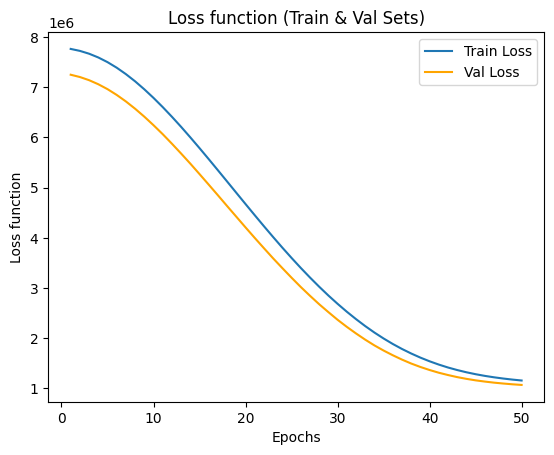

In [16]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(1, len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs, loss_function, label='Train Loss')
plt.plot(epochs, val_loss_function, color='orange', label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

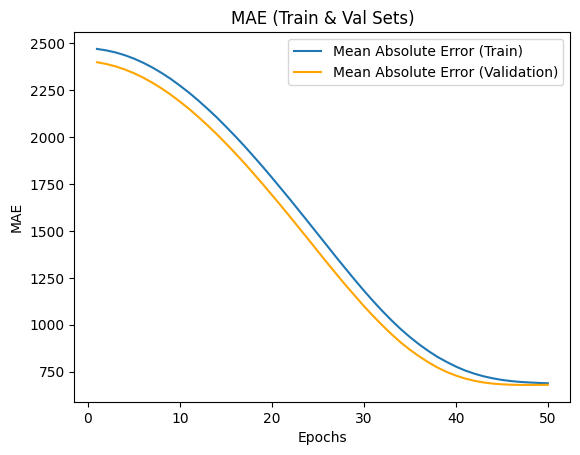

In [17]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1, len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs, mae, label='Mean Absolute Error (Train)')
plt.plot(epochs, val_mae, color='orange', label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [18]:
results = regressor.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 943517.3750 - mae: 681.9301


In [19]:
y_test

6901     1692
4670     1536
6134     2256
2480     1526
8744     2748
         ... 
5834     3052
10531    1815
1912     1985
6279     4005
3881     2207
Name: TOTALDOL, Length: 995, dtype: int64

In [20]:
x_test_pattern = X_test[2, :]
y_pred = regressor.predict(x_test_pattern.reshape(1, -1))
print(y_pred[0])

1/1 [==============================] - 0s 234ms/step
[2008.6799]


In [21]:
original_features = min_max_scaler.inverse_transform(x_test_pattern.reshape(1, -1))
original_features

array([[3.00000000e+00, 7.00000000e+00, 2.10000000e+01, 4.61011000e+02,
        4.61000000e+02, 3.19867000e+03, 1.09138550e+04, 1.09140000e+04,
        3.02000000e+02, 7.16000000e+03, 0.00000000e+00, 8.10162822e+03,
        1.53600000e+03, 1.00000000e+00, 1.00000000e+00, 2.25600000e+03,
        9.28817000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.00000000e+01, 1.53600000e+03, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 9.29000000e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.09852000e+03, 7.16014700e+03, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+02, 1.00000000e+00, 3.02451000e+02, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+02, 1.93600000e+03, 1.53600000e+03, 0.000000

In [22]:
x_test_pattern

array([0.5       , 0.66666667, 0.76923077, 0.05960983, 0.05964549,
       0.0523986 , 0.05239854, 0.05240068, 0.03259931, 0.017862  ,
       0.        , 0.17477496, 0.10244189, 0.        , 0.1       ,
       0.11532785, 0.09676711, 0.        , 0.        , 0.        ,
       0.66666667, 0.1055247 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06945639, 0.        , 0.        ,
       0.        , 0.        , 0.15159057, 0.1515907 , 0.        ,
       0.        , 0.05270787, 0.        , 0.22387924, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.42857143,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0514668 , 0.09331459, 0.07118102,
       0.        , 0.        , 0.        , 0.        , 0.2       ,
       0.        , 0.        , 0.        , 0.13333333, 0.        ,
       0.04603602, 0.        , 0.        , 0.        , 0.        ,
       0.20628734, 0.2004597 , 0.20045939, 0.19047619, 1.     

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

32/32 [==============================] - 0s 4ms/step


In [26]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 943517.4301389331
MAE: 681.9301386080795
R2: 0.30513302612548565
